In [210]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


### Load Data From CSV File


In [212]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [213]:
df.shape

(346, 10)

### Convert to date time object


In [214]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [215]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [216]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



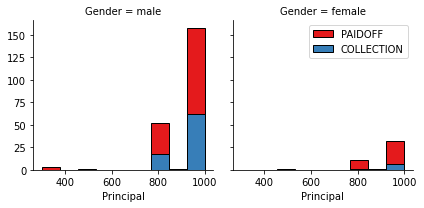

In [217]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

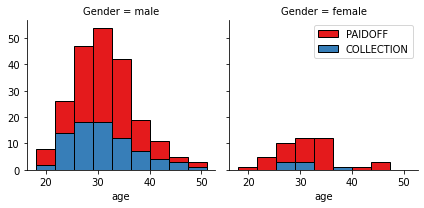

In [218]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


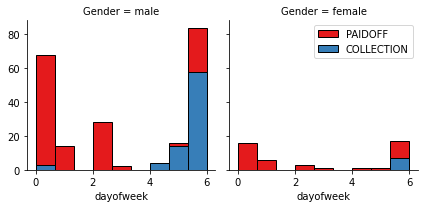

In [219]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [220]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [221]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [222]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)

df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [223]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              1              0.750000
                      0              0.250000
High School or Below  1              0.741722
                      0              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               1              0.765101
                      0              0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [224]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [225]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [226]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [227]:
y = df['loan_status'].values

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [228]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# General Model Building Procedure

1) For each algorithm we use the implementation from the Scikit-learn library used in the associated course lab. 

2) We pick a model input parameter (in the Scikit-learn function) to optimize, again, generally the same specific parameter specified in the model in the associated lab.

3) We then statistically test each model "version" by calculating the average Jaccard Index over 50 random train/test splits, each with 20% test size. 

4) Finally we chose the best model parameter for our final model (or infer that the model is insensitive to the parameter) and train the model on the full dataset (X). 

In [229]:
tests = 50 # number of test/training splits, trainings, and predictions

## K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [230]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 

We test to find the best k for the KNN model.

In [261]:
kmax = 150 # The max k tested in our search for best knn parameter
kMeanAccuracy = []  
kStdAccuracy = []

for k in range(1,kmax):
    testAccuracy = []
    for t in range(tests):
        #Randomly split the train/test data for each test
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
        #Train Model and Predict  
        neigh = KNeighborsClassifier(n_neighbors = k)
        neigh.fit(X_train,y_train)
        yhat = neigh.predict(X_test)

        testAccuracy.append(metrics.jaccard_score(yhat,y_test))
    testAccuracy = np.array(testAccuracy)
    kMeanAccuracy.append(np.mean(testAccuracy))
    kStdAccuracy.append(np.std(testAccuracy))

kMeanAccuracy = np.array(kMeanAccuracy)
kStdAccuracy = np.array(kStdAccuracy)

The best mean accuracy was 0.770 with k = 141


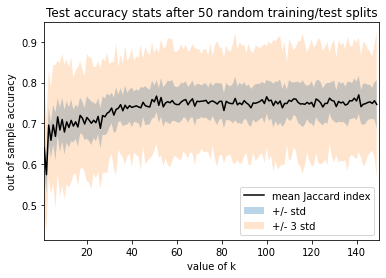

In [262]:
plt.plot(range(1,kmax),kMeanAccuracy,'-k',label = "mean Jaccard index")    
plt.fill_between(range(1,kmax),kMeanAccuracy - 1 * kStdAccuracy,kMeanAccuracy + 1 * kStdAccuracy, alpha=0.30,label = '+/- std')
plt.fill_between(range(1,kmax),kMeanAccuracy - 3 * kStdAccuracy,kMeanAccuracy + 3 * kStdAccuracy, alpha=0.2,label = '+/- 3 std')
plt.xlim(1,kmax)
plt.xlabel("value of k")
plt.ylabel("out of sample accuracy")
plt.legend(loc='lower right')
plt.title("Test accuracy stats after " + str(tests) +" random training/test splits")

print( "The best mean accuracy was %.3f" % kMeanAccuracy.max(), "with k =", kMeanAccuracy.argmax()+1)


Now create our best predictor using the whole dataset to train the model with all of the given data. Though we output a "best" value of k for our statistical test, we see in the plot that many k values yield qualitativly similar results. 

In [233]:
neigh = KNeighborsClassifier(n_neighbors = 80)
neigh.fit(X,y)

KNeighborsClassifier(n_neighbors=80)

## Decision Tree


In [234]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

We find the best max depth for the decision tree. 

In [235]:
maxDs = 50

maxDaccMean = []
maxDaccStd = []
for maxD in range(1,maxDs):
    tmpList = []
    for t in range(1,tests):        
        X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2)
        
        debtTree = DecisionTreeClassifier(criterion="entropy", max_depth = maxD)
        debtTree.fit(X_trainset,y_trainset)
        predTree = debtTree.predict(X_testset)
        tmpList.append(metrics.accuracy_score(y_testset, predTree))

    tmpList = np.array(tmpList)
    maxDaccMean.append(np.mean(tmpList))
    maxDaccStd.append(np.std(tmpList))

maxDaccMean = np.array(maxDaccMean)
maxDaccStd = np.array(maxDaccStd)



The best mean accuracy was 0.754 with maxD = 2


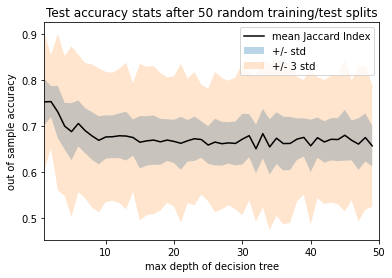

In [236]:
plt.plot(range(1,maxDs),maxDaccMean,'-k',label = "mean Jaccard Index")
plt.fill_between(range(1,maxDs),maxDaccMean - 1 * maxDaccStd,maxDaccMean + 1 * maxDaccStd, alpha=0.30,label = '+/- std')
plt.fill_between(range(1,maxDs),maxDaccMean - 3 * maxDaccStd,maxDaccMean + 3 * maxDaccStd, alpha=0.2,label = '+/- 3 std')
plt.xlim(1,maxDs)
plt.xlabel("max depth of decision tree")
plt.ylabel("out of sample accuracy")
plt.legend(loc='upper right')
plt.title("Test accuracy stats after " + str(tests) +" random training/test splits")
print( "The best mean accuracy was %.3f" % maxDaccMean.max(), "with maxD =", maxDaccMean.argmax()+1)


The decision tree appears to do the best with a max depth of 1 or 2, and, after testing both in the final evalution section, they both produce the same results.  

Next we make the best decision tree by using 1 as the max depth and using the full data set for training. 

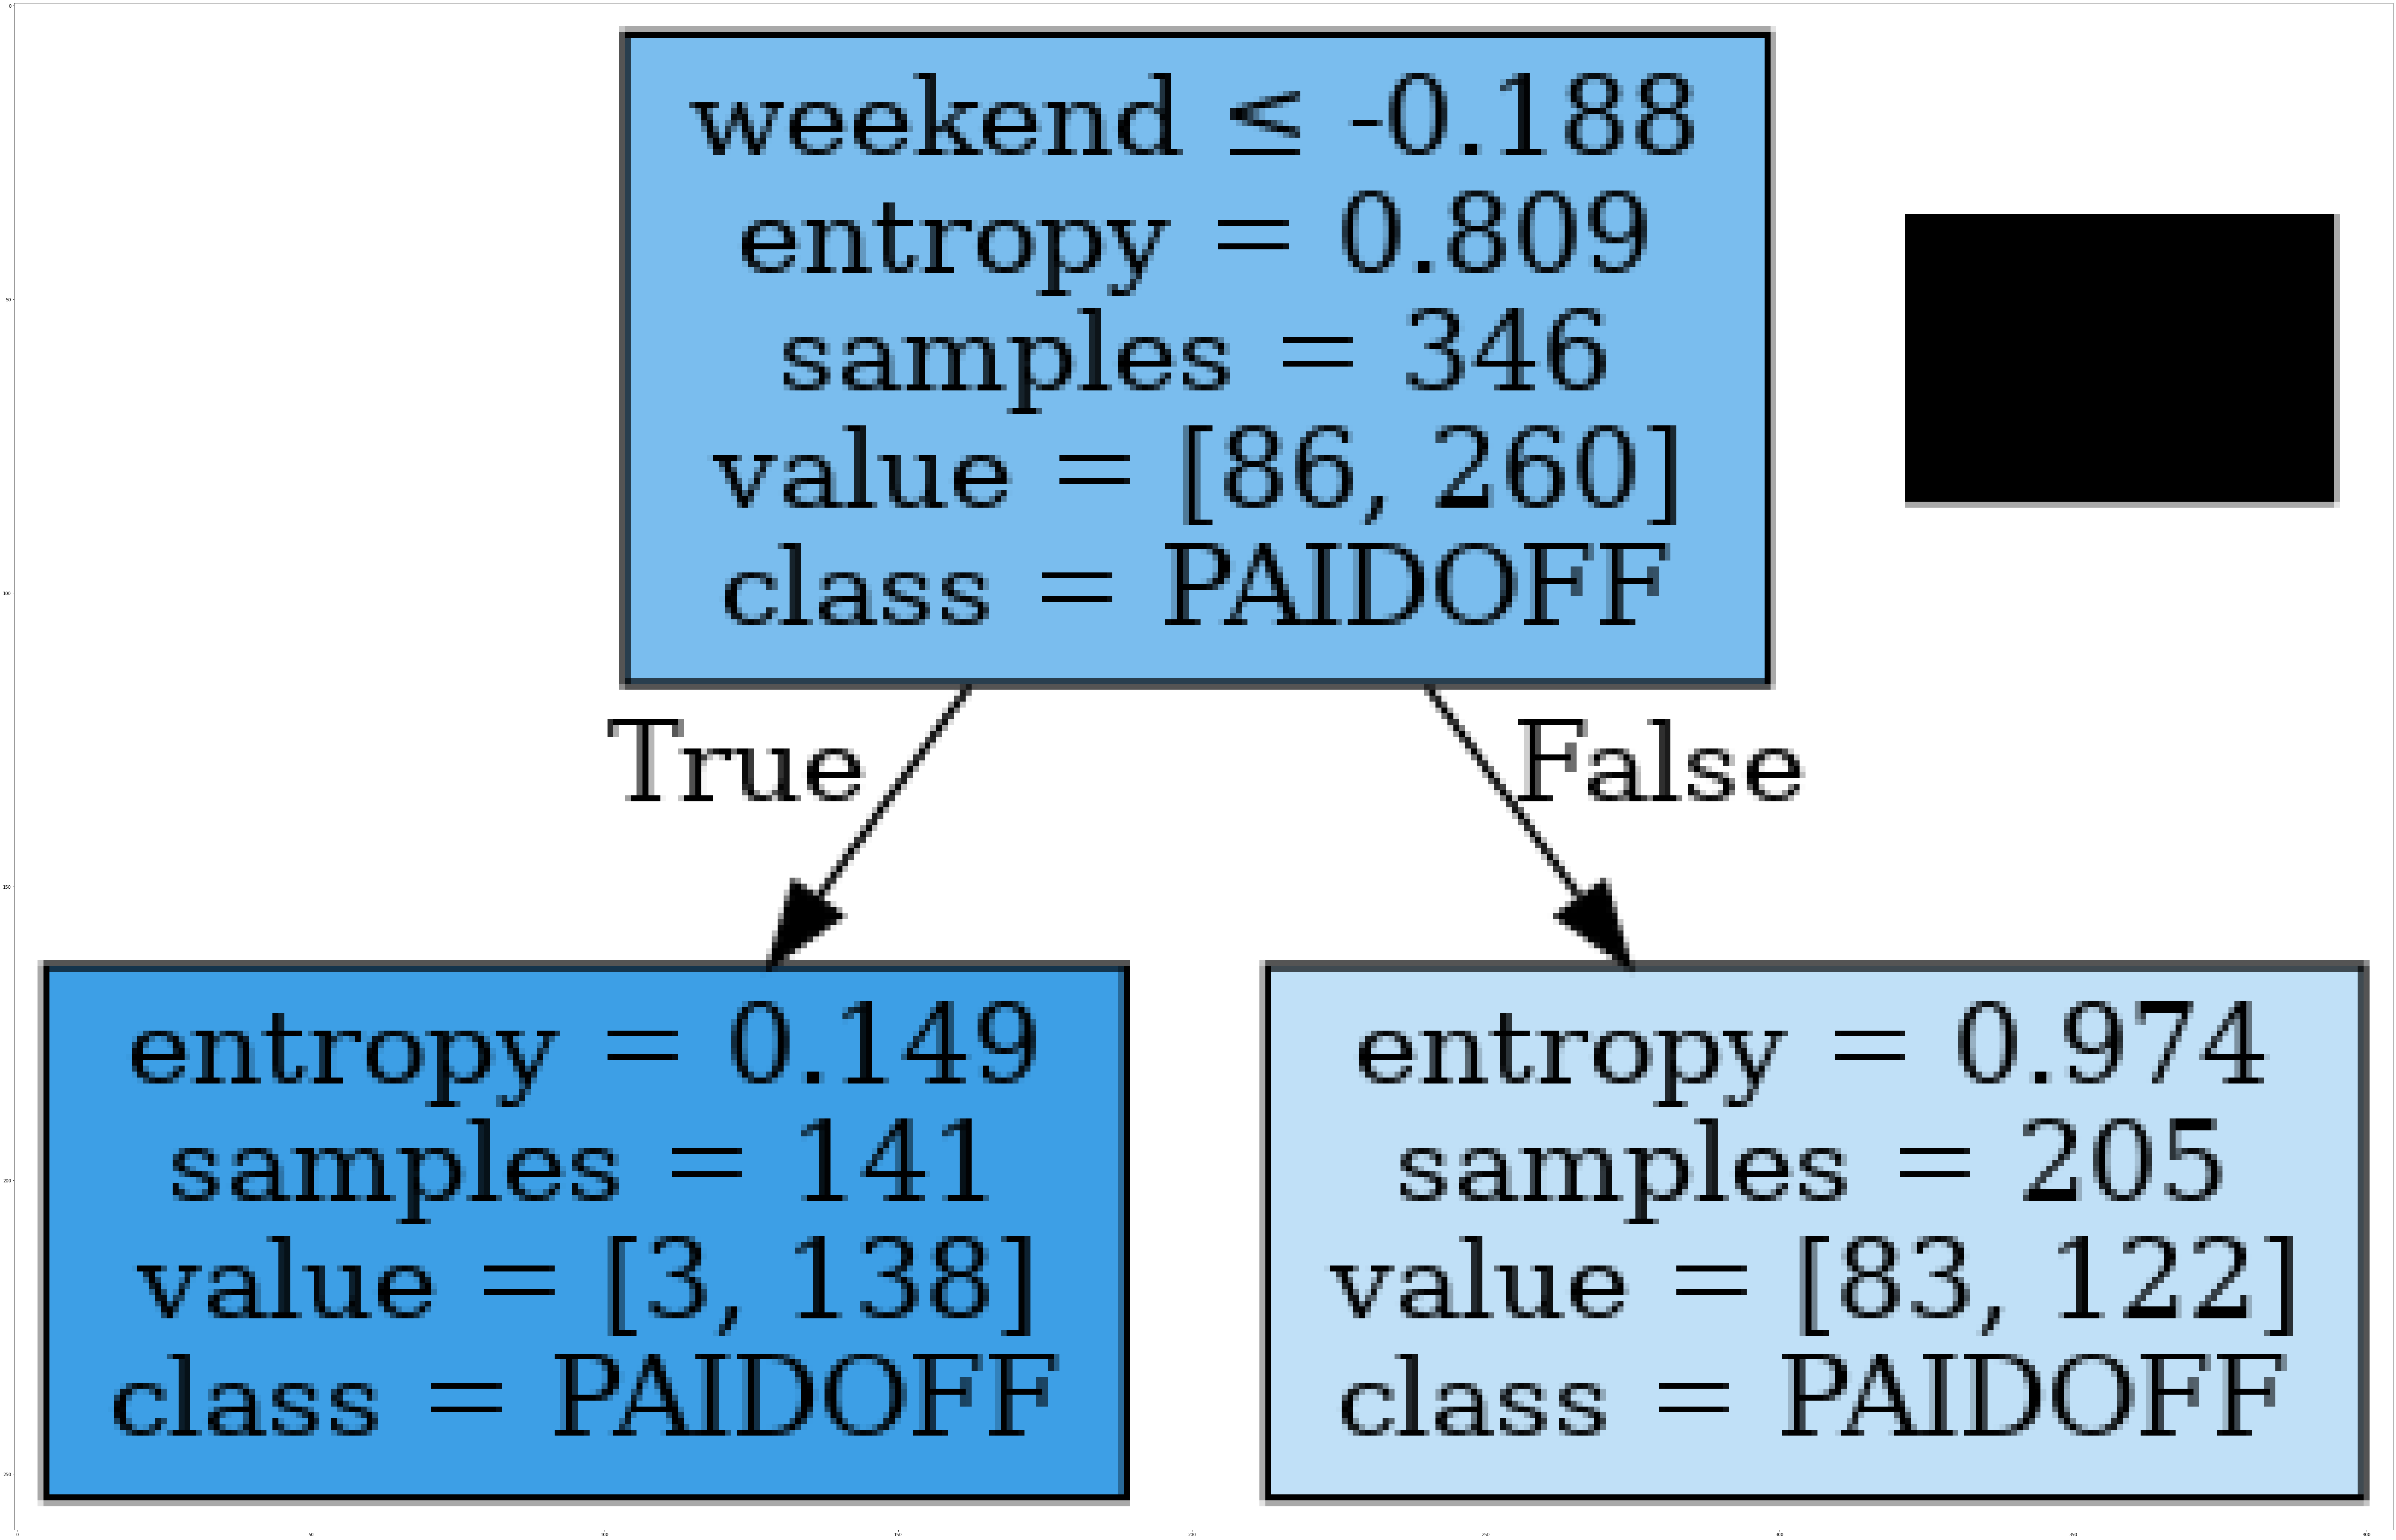

In [256]:
debtTree = DecisionTreeClassifier(criterion="entropy", max_depth = 1)
debtTree.fit(X,y)

from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

dot_data = StringIO()
filename = "debttree.png"
featureNames = Feature.columns[0:8]
y_trainsetLbls = ['PAIDOFF' if x == 0 else 'COLLECTION' for x in y_testset ]
out=tree.export_graphviz(debtTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainsetLbls), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest') 

This model figure clearly shows that the classifier predicts 'PAIDOFF' for all inputs. Maybe the other models are similar? hint hint. 

## Support Vector Machine


In [239]:
from sklearn import svm
kernels = ['rbf','linear','poly','sigmoid']

svmAccMean = []
svmAccStd = []
for kern in kernels:
    svmClassifier = svm.SVC(kernel=kern)
    tmp = []
    for t in range(tests):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
        svmClassifier.fit(X_train, y_train) 
        yhat = svmClassifier.predict(X_test)
        tmp.append(metrics.accuracy_score(yhat,y_test))

    tmp = np.array(tmp)
    svmAccMean.append(np.mean(tmp))
    svmAccStd.append(np.std(tmp))

svmAccMean = np.array(svmAccMean)
svmAccStd = np.array(svmAccStd)


The best mean accuracy was 0.748 with kernel = linear


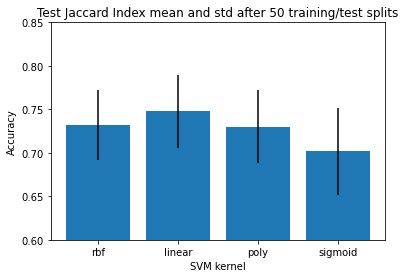

In [240]:
plt.bar(kernels, svmAccMean, yerr=svmAccStd)
plt.ylabel("Accuracy")
plt.ylim((0.6,0.85))
plt.xlabel("SVM kernel")
plt.title("Test Jaccard Index mean and std after " + str(tests) +" training/test splits")


print( "The best mean accuracy was %.3f" % svmAccMean.max(), "with kernel =", kernels[svmAccMean.argmax()])



Create best SVM classifier by using the linear kernel and the full dataset.

In [241]:
svmClassifier = svm.SVC(kernel='linear')
svmClassifier.fit(X,y)

SVC(kernel='linear')

## Logistic Regression


In [264]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

cs = np.linspace(0.0001,0.5,200)
cStd = []
cJaccard = []
cF1 = [] 

for c in cs:    
    tmpJ = []
    tmpF = []
    for t in range(tests):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
        LR = LogisticRegression(C=c, solver='liblinear').fit(X_train,y_train)
        yhat = LR.predict(X_test)    
        tmpJ.append(metrics.jaccard_score(yhat,y_test))
        tmpF.append(metrics.f1_score(yhat,y_test))

    tmpJ = np.array(tmpJ)
    cJaccard.append(np.mean(tmpJ))
    cStd.append(np.std(tmpJ))    

    tmpF = np.array(tmpF)
    cF1.append(np.mean(tmpF))

cJaccard = np.array(cJaccard)
cStd = np.array(cStd)
cF1 = np.array(cF1)


The best mean accuracy was 0.741 with C = 0.116


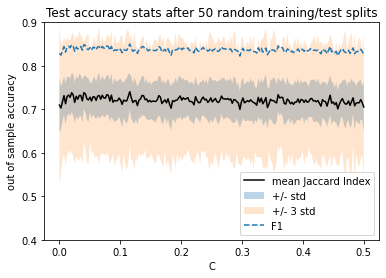

In [265]:
plt.plot(cs,cJaccard,'-k',label = "mean Jaccard Index")
plt.fill_between(cs,cJaccard - 1 * cStd,cJaccard + 1 * cStd, alpha=0.30,label = '+/- std')
plt.fill_between(cs,cJaccard - 3 * cStd,cJaccard + 3 * cStd, alpha=0.2,label = '+/- 3 std')
plt.plot(cs,cF1, '--',label='F1')
plt.xlabel("C")
plt.ylabel("out of sample accuracy")
plt.ylim((0.4,0.9))
plt.legend(loc='lower right')
plt.title("Test accuracy stats after " + str(tests) +" random training/test splits")
print( "The best mean accuracy was %.3f" % cJaccard.max(), "with C = %.3f" % cs[cJaccard.argmax()])


Here is another case where the model parameter tested does not impact the accuarcy of the model signifigantly. We will choose c = 0.02. 

In [244]:
LR = LogisticRegression(C=0.02, solver='liblinear')
LR.fit(X,y)
 

LogisticRegression(C=0.02, solver='liblinear')

# Model Evaluation using Test set


In [266]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [246]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-03-03 18:15:28--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0.001s  

2022-03-03 18:15:29 (4.54 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [247]:
test_df = pd.read_csv('loan_test.csv')
print(test_df.shape)
test_df.head()

(54, 10)


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


First we clean up the data as we did before we calibrated our models above.


In [248]:
# Convert dates to date time objects
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

# creat the 'weekend' feature
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

# convert categorical features to numerical values 
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
# Create the by choosing the following features... 
TestFeature = test_df[['Principal','terms','age','Gender','weekend']]
# ... and appending the following binary features using hot encoding technique
TestFeature = pd.concat([TestFeature,pd.get_dummies(test_df['education'])], axis=1)
TestFeature.drop(['Master or Above'], axis = 1,inplace=True)
X_finaltest = TestFeature

# Normalize the data (zero mean, unit std)
X_finaltest= preprocessing.StandardScaler().fit(X_finaltest).transform(X_finaltest) 

# select our now binary lables (1 = 'PAIDOFF', 0= 'COLLECTION')
y_finaltest = test_df['loan_status'].values 

We predict on the new data with each model created in the previous section. 

In [249]:
yhat_neigh = neigh.predict(X_finaltest)
yhat_tree = debtTree.predict(X_finaltest)
yhat_svm = svmClassifier.predict(X_finaltest)
yhat_lr = LR.predict(X_finaltest)
yhat_lr_prob = LR.predict_proba(X_finaltest)

Print out the metrics. 

In [276]:
print("KNN Jaccard score = %.2f" % jaccard_score(y_finaltest, yhat_neigh))
print("DecTree Jaccard score = %.2f" % jaccard_score(y_finaltest,yhat_tree))
print("SVM Jaccard score = %.2f" % jaccard_score(y_finaltest,yhat_svm))
print("LR Jaccard score = %.2f" % jaccard_score(y_finaltest,yhat_lr))

print('\n')

print("KNN f1 score = %.2f" % f1_score(y_finaltest, yhat_neigh))
print("DecTree f1 score = %.2f" % f1_score(y_finaltest, yhat_tree))
print("SVM f1 score = %.2f" % f1_score(y_finaltest, yhat_svm))
print("LR f1 score = %.2f" % f1_score(y_finaltest, yhat_lr))

print('\n')

print("LR log loss = %.2f" % log_loss(y_finaltest,yhat_lr_prob))

KNN Jaccard score = 0.74
DecTree Jaccard score = 0.74
SVM Jaccard score = 0.74
LR Jaccard score = 0.74


KNN f1 score = 0.85
DecTree f1 score = 0.85
SVM f1 score = 0.85
LR f1 score = 0.85


LR log loss = 0.52


# Report

Table summarizing the accuracy of each model using a few metrics. 


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.74    | 0.85     | NA      |
| Decision Tree      | 0.74    | 0.85     | NA      |
| SVM                | 0.74    | 0.85     | NA      |
| LogisticRegression | 0.74    | 0.85     | 0.52    |


Given the results are the same for each algorith/model and the fact that the decision tree diagrame explicitly showed that every feature set mapped to a 'PAIDOFF' (which corresponds to 1), lets inspect to see if any predictions were 'COLLECTION' (or 0). 

In [270]:
# If any prediction was 0, print 0. 
np.array([yhat_neigh.min(),yhat_tree.min(),yhat_svm.min(),yhat_lr.min()]).min()

1

### Side note on Jaccard and F1 calculations
These values are highly depenedent on the labels for binary classifications. 
For this case, the Jaccard index is calculated using the algorithm outlined here: https://en.wikipedia.org/wiki/Jaccard_index#Similarity_of_asymmetric_binary_attributes

This is somewhat of a problem given that it depends heavily on True Positives, which depending on our choice of 'PAIDOFF' or 'COLLECTION' being 1 or 0, the Jaccard score will either be usefull or 0, respectively. 